# Neighborhood Case Studies 

Hello, Audrey here. Shinah and I are planning on comparing four pairs of Seoul and LA neighborhoods, selected by population density, job density, commute mode, and transit ridership. 

In this Jupyter notebook I will use OSMnx to compare the most population-dense neighborhoord from each city.

ISOCHRONE MAPS 

Within a framework of complex adaptive systems and assemblage thinking we develop isochrone mapping of urban transport access in four transport modes: walking, cycling, public transport and cars. These isochrones can be used to compare the range and area of urban access for each of these modes, over different time limits and for different times of day. Such mapping gears urban morphology to the phenomenology of urban transport and enables us to better understand mode choice. Through design research we can also test a range of possible design scenarios for infrastructure investment and show their impact on the isochrone maps. We conclude with a focus on the relations between car and public transport isochrones as a means of better understanding car-dependency and what we call the ‘Car/PT assemblage’.

* compare the street grid 
* compare the network statistics <-- does this include transit infrastructure? hm. 
* create isochrone maps for walk vs drive for each neighborhood, and compare 

This Jupyter notebook will accomplish the first two objectives, while I will create a separate jupyter notebook for the second and third. 



## Identify Neighborhoods for Paired Analysis

The most population dense neighborhoods in Los Angeles are: 
1. Westlake
2. Koreatown
3. Westwood
4. Panorama City 

The most population dense neighborhoods in Seoul are: 
1. Sadang 4(sa)-dong 
2. 
3. 
4. 

*The 'dong' is the smallest level of urban-area division to have its own office and staff in South Korea. There are two types of dong: legal-status neighborhood (법정동) and administrative neighborhood (행정동). For land property and (old) address, legal-status neighborhood is mainly used.
*A census block is the smallest geographic unit used by the United States Census Bureau for tabulation of 100-percent data (data collected from all houses, rather than a sample of houses).


##### Call in data

In [29]:
# for spatial data
import geopandas as gpd

# for plotting
import matplotlib.pyplot as plt

# for network analysis
import networkx as nx

# for street network analysis
import osmnx as ox

# for basemaps
import contextily as ctx

In [30]:
# configure the place, network type, trip times, and travel speed
LA_neighborhood = 'Westlake, Los Angeles, CA, USA'
network_type = 'walk'
trip_times = [5, 10, 15, 20] #in minutes
meters_per_minute = 75 # travel distance per minute

In [31]:
# configure the place, network type, trip times, and travel speed
Seoul_neighborhood = 'Sadang 4(sa)-dong, Seoul, South Korea'
network_type = 'walk'
trip_times = [5, 10, 15, 20] #in minutes
meters_per_minute = 75 # travel distance per minute

## Explore Street Grids

##### Initial Mapping with OSMnx

Westlake, Los Angeles: 

In [32]:
%%time
# %%time is a magic command to see how long it takes this cell to run 

# download the street network
westlake = ox.graph_from_place(LA_neighborhood, network_type=network_type)

CPU times: user 3.78 s, sys: 40 ms, total: 3.82 s
Wall time: 12.4 s


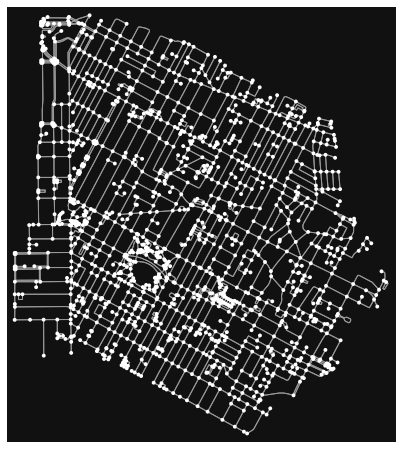

In [33]:
fig, ax = ox.plot_graph(westlake)

In [34]:
# project our network data to Web Mercator (measurements are in meters)
westlake = ox.project_graph(westlake, to_crs='epsg:3857')

Sadang 4-dong, Seoul:

In [35]:
%%time
# %%time is a magic command to see how long it takes this cell to run 

# download the street network
sadang4 = ox.graph_from_place(Seoul_neighborhood, network_type=network_type)

CPU times: user 796 ms, sys: 19 ms, total: 815 ms
Wall time: 6.34 s


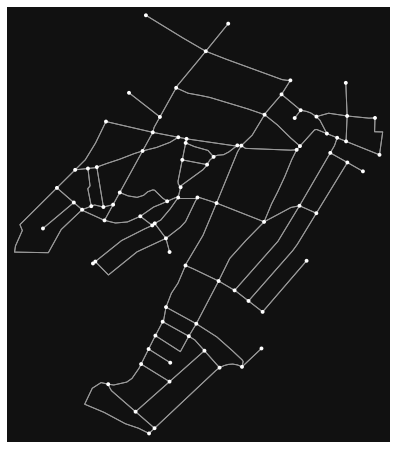

In [36]:
fig, ax = ox.plot_graph(sadang4)

In [37]:
# project our network data to Web Mercator (measurements are in meters)
sadang4 = ox.project_graph(sadang4, to_crs='epsg:3857')

## Nodes and Edges

##### Create Geodataframes

Now to create geodataframes for the nodes and edges in Westlake and Sadang 4-dong. 

Westlake: 

In [38]:
# convert nodes and edges to two separate geodataframes 
westlake_node, westlake_edge = ox.graph_to_gdfs(westlake)

In [39]:
westlake_node.head()

,y,x,osmid,lon,lat,highway,geometry
18166164,4.038560e+06,-1.316732e+07,18166164,-118.284053,34.072644,NaN,POINT (-13167320.516 4038560.490)
18166944,4.037759e+06,-1.316579e+07,18166944,-118.270308,34.066679,traffic_signals,POINT (-13165790.407 4037758.891)
21300247,4.036588e+06,-1.316641e+07,21300247,-118.275888,34.057963,traffic_signals,POINT (-13166411.625 4036587.645)
21300249,4.035921e+06,-1.316518e+07,21300249,-118.264867,34.052999,traffic_signals,POINT (-13165184.784 4035920.706)
21306066,4.036381e+06,-1.316603e+07,21306066,-118.272496,34.056422,traffic_signals,POINT (-13166033.996 4036380.614)


Mapping to see what Westlake's nodes & edges look like:

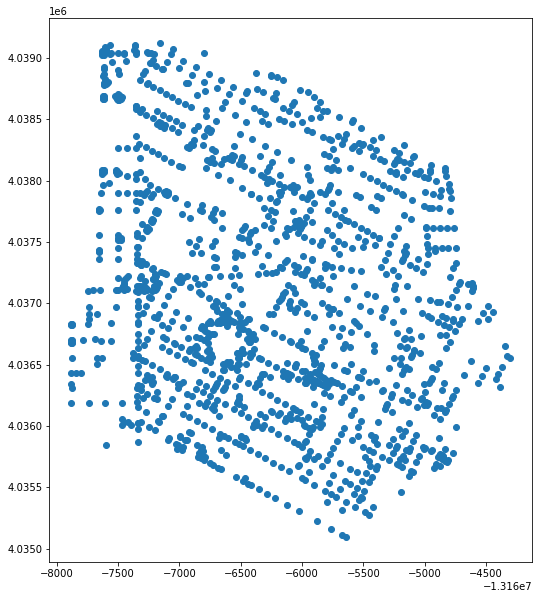

In [40]:
westlake_node.plot(figsize =(10,10))

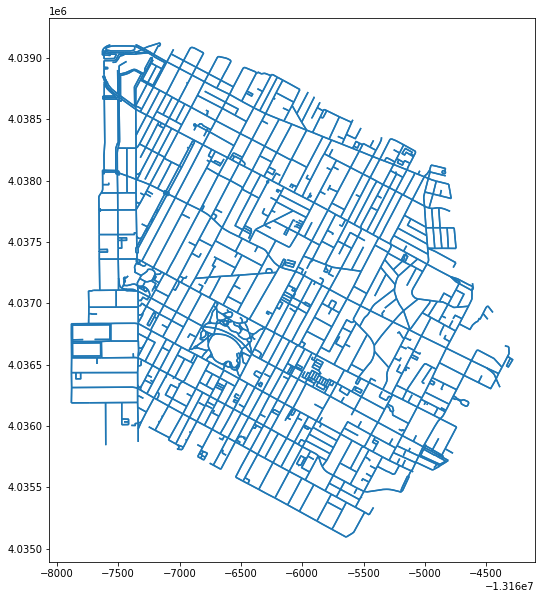

In [41]:
westlake_edge.plot(figsize =(10,10)) 

Sadang 4-dong: 

In [42]:
sadang4_node, sadang4_edge = ox.graph_to_gdfs(sadang4)

In [43]:
sadang4_node.head()

,y,x,osmid,lon,lat,geometry
1685686378,4.506534e+06,1.413475e+07,1685686378,126.974611,37.482197,POINT (14134749.029 4506533.688)
1685686503,4.506456e+06,1.413463e+07,1685686503,126.973570,37.481644,POINT (14134633.179 4506456.057)
1685686548,4.506610e+06,1.413475e+07,1685686548,126.974583,37.482739,POINT (14134745.979 4506609.735)
1685686600,4.506475e+06,1.413475e+07,1685686600,126.974589,37.481781,POINT (14134746.580 4506475.373)
2826150777,4.506746e+06,1.413448e+07,2826150777,126.972159,37.483708,POINT (14134476.051 4506745.642)


In [44]:
westlake_node.head()

,y,x,osmid,lon,lat,highway,geometry
18166164,4.038560e+06,-1.316732e+07,18166164,-118.284053,34.072644,NaN,POINT (-13167320.516 4038560.490)
18166944,4.037759e+06,-1.316579e+07,18166944,-118.270308,34.066679,traffic_signals,POINT (-13165790.407 4037758.891)
21300247,4.036588e+06,-1.316641e+07,21300247,-118.275888,34.057963,traffic_signals,POINT (-13166411.625 4036587.645)
21300249,4.035921e+06,-1.316518e+07,21300249,-118.264867,34.052999,traffic_signals,POINT (-13165184.784 4035920.706)
21306066,4.036381e+06,-1.316603e+07,21306066,-118.272496,34.056422,traffic_signals,POINT (-13166033.996 4036380.614)


^ why doesn't sadang4_node have a 'highway' column? This means I can't do an isochrome map for Sadang 4-dong. 

Instead of mapping Sadang 4-dong separately, I want to try mapping the edges of Westlake and Sadang 4-dong side by side. 
Week 3 lab used subplots, so I'm not sure if I can do the same thing for the more complex isochrome plots. 
Here goes: 

Text(0.5, 1.0, 'Sadang 4-dong Street Grid')

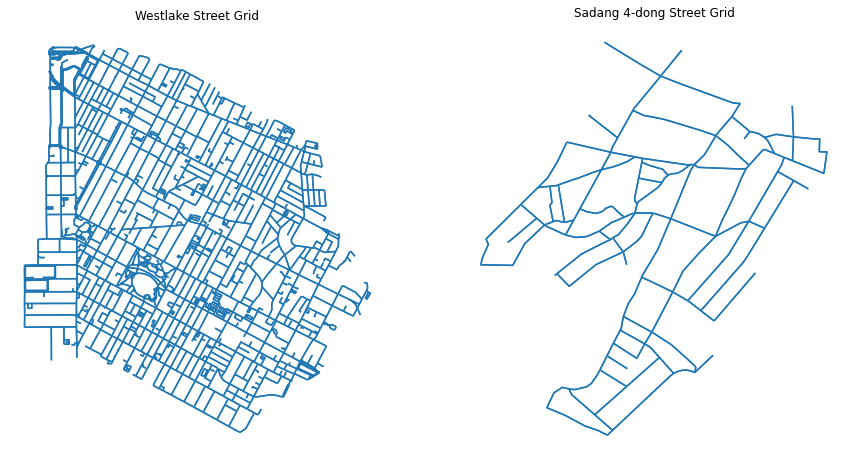

In [45]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs

# regular count map on the left
westlake_edge.plot(figsize =(10,10),
                  ax = ax1) 

ax1.axis("off")
ax1.set_title("Westlake Street Grid")

# spatial lag map on the right
sadang4_edge.plot(figsize =(10,10),
                 ax = ax2) 

ax2.axis("off")
ax2.set_title("Sadang 4-dong Street Grid")

## Street Grid Statistics  

##### Clean edge dataframes 

Let's see what info we have about these lines. 

Westlake: 

In [46]:
westlake_edge.head()

,osmid,lanes,name,highway,oneway,length,geometry,maxspeed,bridge,service,access,tunnel,u,v,key
0,384821204,4,Beverly Boulevard,primary,False,34.870,"LINESTRING (-13167320.516 4038560.490, -131673...",NaN,NaN,NaN,NaN,NaN,18166164,123000366,0
1,384821204,4,Beverly Boulevard,primary,False,47.763,"LINESTRING (-13167320.516 4038560.490, -131672...",NaN,NaN,NaN,NaN,NaN,18166164,1966013544,0
2,161702919,NaN,Robinson Street,residential,False,21.279,"LINESTRING (-13167320.516 4038560.490, -131673...",NaN,NaN,NaN,NaN,NaN,18166164,7808831228,0
3,"[161707962, 398690476]","[6, 7]",Alvarado Street,primary,False,54.147,"LINESTRING (-13165790.407 4037758.891, -131657...",35 mph,NaN,NaN,NaN,NaN,18166944,2624887869,0
4,"[398685872, 398685873, 398685871]","[6, 7]",Beverly Boulevard,primary,False,106.344,"LINESTRING (-13165790.407 4037758.891, -131658...",NaN,NaN,NaN,NaN,NaN,18166944,123000337,0


Sadang 4-dong: 

In [47]:
sadang4_edge.head()

,osmid,name,highway,oneway,length,geometry,u,v,key
0,156298102,사당로18길,residential,False,46.265,"LINESTRING (14134749.029 4506533.688, 14134746...",1685686378,1685686600,0
1,156298102,사당로18길,residential,False,60.327,"LINESTRING (14134749.029 4506533.688, 14134745...",1685686378,1685686548,0
2,419521875,사당로20가길,residential,False,50.898,"LINESTRING (14134749.029 4506533.688, 14134798...",1685686378,4195684426,0
3,419521875,사당로20가길,residential,False,57.091,"LINESTRING (14134749.029 4506533.688, 14134706...",1685686378,2876972760,0
4,419521861,사당로20나길,residential,False,9.021,"LINESTRING (14134633.179 4506456.057, 14134640...",1685686503,2826160235,0


##### Calculate network statistics

Ok now I'll use OSMnx fancy tools for calculating street grid network stats. 

Westlake: 

In [48]:
westlake_stats = ox.basic_stats(westlake, circuity_dist='euclidean')
westlake_stats 

{'n': 1461,
 'm': 4168,
 'k_avg': 5.705681040383299,
 'intersection_count': 1252,
 'streets_per_node_avg': 2.9466119096509242,
 'streets_per_node_counts': {0: 0, 1: 209, 2: 0, 3: 921, 4: 322, 5: 9},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.1430527036276523,
  2: 0.0,
  3: 0.6303901437371663,
  4: 0.22039698836413416,
  5: 0.006160164271047228},
 'edge_length_total': 290195.99800000014,
 'edge_length_avg': 69.62475959692901,
 'street_length_total': 145097.999,
 'street_length_avg': 69.62475959692898,
 'street_segments_count': 2084,
 'node_density_km': None,
 'intersection_density_km': None,
 'edge_density_km': None,
 'street_density_km': None,
 'circuity_avg': 0.881316980643874,
 'self_loop_proportion': 0.0047984644913627635,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None}

Documentation for ox.basic_stats(): https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.stats.basic_stats

In [49]:
type(westlake_stats)

dict

Ok so what is a dict... 

From documentation: 

"The Graph class uses a dict-of-dict-of-dict data structure. The outer dict (node_dict) holds adjacency information keyed by node. The next dict (adjlist_dict) represents the adjacency information and holds edge data keyed by neighbor. The inner dict (edge_attr_dict) represents the edge data and holds edge attribute values keyed by attribute names. 
Each of these three dicts can be replaced in a subclass by a user defined dict-like object. In general, the dict-like features should be maintained but extra features can be added. To replace one of the dicts create a new graph class by changing the class(!) variable holding the factory for that dict-like structure. The variable names are node_dict_factory, node_attr_dict_factory, adjlist_inner_dict_factory, adjlist_outer_dict_factory, edge_attr_dict_factory and graph_attr_dict_factory."


Didn't quite understand, so I googled it...  

"NetworkX uses dicts to store the nodes and neighbors in a graph."

"Graph—Undirected graphs with self loops"*

Source: https://networkx.org/documentation/stable/reference/classes/index.html#basic-graph-types


Eh I'm not comfortable with dicts so I'm going to convert Westlake's network stats to a dataframe. 
Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.from_dict.html 


In [50]:
import pandas as pd
westlake_pd = pd.DataFrame.from_dict(westlake_stats)
westlake_pd

,n,m,k_avg,intersection_count,streets_per_node_avg,streets_per_node_counts,streets_per_node_proportion,edge_length_total,edge_length_avg,street_length_total,street_length_avg,street_segments_count,node_density_km,intersection_density_km,edge_density_km,street_density_km,circuity_avg,self_loop_proportion,clean_intersection_count,clean_intersection_density_km
0,1461,4168,5.705681,1252,2.946612,0,0.000000,290195.998,69.62476,145097.999,69.62476,2084,None,None,None,None,0.881317,0.004798,None,None
1,1461,4168,5.705681,1252,2.946612,209,0.143053,290195.998,69.62476,145097.999,69.62476,2084,None,None,None,None,0.881317,0.004798,None,None
2,1461,4168,5.705681,1252,2.946612,0,0.000000,290195.998,69.62476,145097.999,69.62476,2084,None,None,None,None,0.881317,0.004798,None,None
3,1461,4168,5.705681,1252,2.946612,921,0.630390,290195.998,69.62476,145097.999,69.62476,2084,None,None,None,None,0.881317,0.004798,None,None
4,1461,4168,5.705681,1252,2.946612,322,0.220397,290195.998,69.62476,145097.999,69.62476,2084,None,None,None,None,0.881317,0.004798,None,None
5,1461,4168,5.705681,1252,2.946612,9,0.006160,290195.998,69.62476,145097.999,69.62476,2084,None,None,None,None,0.881317,0.004798,None,None


Now the same for Sadang 4-dong: 

In [51]:
sadang4_stats = ox.basic_stats(sadang4, circuity_dist='euclidean')

In [52]:
sadang4_pd = pd.DataFrame.from_dict(sadang4_stats)
sadang4_pd

,n,m,k_avg,intersection_count,streets_per_node_avg,streets_per_node_counts,streets_per_node_proportion,edge_length_total,edge_length_avg,street_length_total,street_length_avg,street_segments_count,node_density_km,intersection_density_km,edge_density_km,street_density_km,circuity_avg,self_loop_proportion,clean_intersection_count,clean_intersection_density_km
0,85,240,5.647059,79,3.082353,0,0.000000,15525.252,64.68855,7762.626,64.68855,120,None,None,None,None,0.841931,0.0,None,None
1,85,240,5.647059,79,3.082353,6,0.070588,15525.252,64.68855,7762.626,64.68855,120,None,None,None,None,0.841931,0.0,None,None
2,85,240,5.647059,79,3.082353,0,0.000000,15525.252,64.68855,7762.626,64.68855,120,None,None,None,None,0.841931,0.0,None,None
3,85,240,5.647059,79,3.082353,60,0.705882,15525.252,64.68855,7762.626,64.68855,120,None,None,None,None,0.841931,0.0,None,None
4,85,240,5.647059,79,3.082353,19,0.223529,15525.252,64.68855,7762.626,64.68855,120,None,None,None,None,0.841931,0.0,None,None


##### Combine into comparative street grid statistics table 

Okay now I want to combine these tables to one, with each statistic in a row and the two cities in adjacent columns. 

It seems that all the rows have the same values within each dataframe, so I'm first going to drop the redundant rows for both:

In [53]:
westlake_pd = westlake_pd.drop([1, 2, 3, 4, 5]).copy()
westlake_pd

,n,m,k_avg,intersection_count,streets_per_node_avg,streets_per_node_counts,streets_per_node_proportion,edge_length_total,edge_length_avg,street_length_total,street_length_avg,street_segments_count,node_density_km,intersection_density_km,edge_density_km,street_density_km,circuity_avg,self_loop_proportion,clean_intersection_count,clean_intersection_density_km
0,1461,4168,5.705681,1252,2.946612,0,0.0,290195.998,69.62476,145097.999,69.62476,2084,None,None,None,None,0.881317,0.004798,None,None


In [54]:
sadang4_pd = sadang4_pd.drop([0, 2, 3, 4]).copy()
sadang4_pd

,n,m,k_avg,intersection_count,streets_per_node_avg,streets_per_node_counts,streets_per_node_proportion,edge_length_total,edge_length_avg,street_length_total,street_length_avg,street_segments_count,node_density_km,intersection_density_km,edge_density_km,street_density_km,circuity_avg,self_loop_proportion,clean_intersection_count,clean_intersection_density_km
1,85,240,5.647059,79,3.082353,6,0.070588,15525.252,64.68855,7762.626,64.68855,120,None,None,None,None,0.841931,0.0,None,None


Now I'm going to add the Sadang values as the 2nd row (index = 1) to the Westlake dataframe: 

In [55]:
frames = [westlake_pd, sadang4_pd]
compare_stats = pd.concat(frames)
compare_stats

,n,m,k_avg,intersection_count,streets_per_node_avg,streets_per_node_counts,streets_per_node_proportion,edge_length_total,edge_length_avg,street_length_total,street_length_avg,street_segments_count,node_density_km,intersection_density_km,edge_density_km,street_density_km,circuity_avg,self_loop_proportion,clean_intersection_count,clean_intersection_density_km
0,1461,4168,5.705681,1252,2.946612,0,0.000000,290195.998,69.62476,145097.999,69.62476,2084,None,None,None,None,0.881317,0.004798,None,None
1,85,240,5.647059,79,3.082353,6,0.070588,15525.252,64.68855,7762.626,64.68855,120,None,None,None,None,0.841931,0.000000,None,None


Source: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html 

Renaming the index for the City name: 

In [56]:
compare_stats_test = compare_stats.rename(index={0: 'Westlake', 1:'Sadang 4-dong'})
compare_stats_test

,n,m,k_avg,intersection_count,streets_per_node_avg,streets_per_node_counts,streets_per_node_proportion,edge_length_total,edge_length_avg,street_length_total,street_length_avg,street_segments_count,node_density_km,intersection_density_km,edge_density_km,street_density_km,circuity_avg,self_loop_proportion,clean_intersection_count,clean_intersection_density_km
Westlake,1461,4168,5.705681,1252,2.946612,0,0.000000,290195.998,69.62476,145097.999,69.62476,2084,None,None,None,None,0.881317,0.004798,None,None
Sadang 4-dong,85,240,5.647059,79,3.082353,6,0.070588,15525.252,64.68855,7762.626,64.68855,120,None,None,None,None,0.841931,0.000000,None,None


Source: https://note.nkmk.me/en/python-pandas-dataframe-rename/#:~:text=source%3A%20pandas_dataframe_rename.py-,Rename%20column%20%2F%20index%3A%20rename(),change%20column%20%2F%20index%20name%20individually.&text=Specify%20the%20original%20name%20and,index%20is%20for%20index%20name.

I may want to change column names later, but will hold off till Shinah and I decide which stats to keep. 
OSMnx basic_stats documentation: https://osmnx.readthedocs.io/en/stable/osmnx.html 
list(compare_stats_test)
compare_stats_test.columns =

Alright finally I want to switch the columns and rows for this graph so it fits onto our slides. 

The transpose function does change all values to objects though, which may cause problems in the future? 
Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transpose.html 

In [57]:
compare_stats_t = compare_stats_test.T
compare_stats_t

,Westlake,Sadang 4-dong
n,1461,85
m,4168,240
k_avg,5.70568,5.64706
intersection_count,1252,79
streets_per_node_avg,2.94661,3.08235
streets_per_node_counts,0,6
streets_per_node_proportion,0,0.0705882
edge_length_total,290196,15525.3
edge_length_avg,69.6248,64.6885
street_length_total,145098,7762.63


## Isochrone Mapping 

Now for the isochrone mapping! 

I will copy the Week 4 Lab to create isochrones of 5, 10, 15, and 20 min walkshed from the central node - for Sadang 4-dong and Westlake. 

TBH not sure what we're trying to say creating isochrone maps of the most population dense areas. 

But we haven't figured out which neighborhoods have the highest commute mode by transit and by car, nor the neighborhoods near transit stations with the highest ridership. 

So this is just for fun / for the sake of setting this Jupyter notebook up so it can serve as a template for the rest of our paired neighborhood analyses. 

### Declaring Central Node 

First, find centroid of each neighborhood. 

In [58]:
# get the bounding box coordinates
W_minx, W_miny, W_maxx, W_maxy = westlake_node.geometry.total_bounds

In [59]:
S_minx, S_miny, S_maxx, S_maxy = sadang4_node.geometry.total_bounds

In [60]:
# calculate the centroid
W_centroid_x = (W_maxx-W_minx)/2 + W_minx
W_centroid_y = (W_maxy-W_miny)/2 + W_miny 

S_centroid_x = (S_maxx-S_minx)/2 + S_minx
S_centroid_y = (S_maxy-S_miny)/2 + S_miny 

In [61]:
# use osmnx's get_nearest_node command to get the id for the nearest node
W_center_node = ox.get_nearest_node(westlake, 
                                  (W_centroid_y, W_centroid_x), 
                                  method = 'euclidean') 

S_center_node = ox.get_nearest_node(sadang4, 
                                  (S_centroid_y,S_centroid_x), 
                                  method = 'euclidean') 

### Map Network Layers 

Map red central node, blue other nodes, and grey edges for each neighborhood - side by side. 

/opt/conda/lib/python3.8/site-packages/contextily/tile.py:632: UserWarning: The inferred zoom level of 34 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


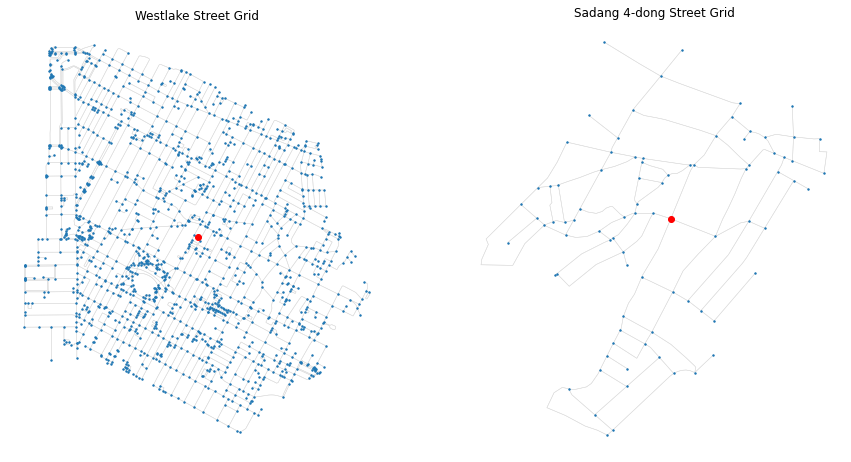

In [62]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs

### WESTLAKE ###
# add the edges to ax
westlake_edge.plot(ax=ax1,
               linewidth=0.5,
               edgecolor='gainsboro', 
               zorder=10)
# add all nodes to ax
westlake_node.plot(ax=ax1, 
               markersize=2, 
               zorder=20)
# add the center node in red also to ax
westlake_node.loc[[W_center_node]].plot(ax=ax1,
                                  color='r', 
                                  zorder=30)
# no axis
ax1.axis("off")

#add a title
ax1.set_title("Westlake Street Grid")


### SADANG 4-DONG ###
# add the edges to ax
sadang4_edge.plot(ax=ax2,
               linewidth=0.5,
               edgecolor='gainsboro', 
               zorder=10)
# add all nodes to ax
sadang4_node.plot(ax=ax2, 
               markersize=2, 
               zorder=20)
# add the center node in red also to ax
sadang4_node.loc[[S_center_node]].plot(ax=ax2,
                                  color='r', 
                                  zorder=30)
# no axis
ax2.axis("off")

#add a title
ax2.set_title("Sadang 4-dong Street Grid")
 

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

### Calculate travel cost 

i.e. add attribute that tells us exactly how long it would take an avg person to traverse the distance of each edge in the neighborhood network. 

##### Add Column for Walk Time

Westlake: 

In [63]:
westlake_edge.head(2)

,osmid,lanes,name,highway,oneway,length,geometry,maxspeed,bridge,service,access,tunnel,u,v,key
0,384821204,4,Beverly Boulevard,primary,False,34.870,"LINESTRING (-13167320.516 4038560.490, -131673...",NaN,NaN,NaN,NaN,NaN,18166164,123000366,0
1,384821204,4,Beverly Boulevard,primary,False,47.763,"LINESTRING (-13167320.516 4038560.490, -131672...",NaN,NaN,NaN,NaN,NaN,18166164,1966013544,0


In [64]:
westlake_edge['walk_time'] = westlake_edge['length']/meters_per_minute
westlake_edge.head(2)

,osmid,lanes,name,highway,oneway,length,geometry,maxspeed,bridge,service,access,tunnel,u,v,key,walk_time
0,384821204,4,Beverly Boulevard,primary,False,34.870,"LINESTRING (-13167320.516 4038560.490, -131673...",NaN,NaN,NaN,NaN,NaN,18166164,123000366,0,0.464933
1,384821204,4,Beverly Boulevard,primary,False,47.763,"LINESTRING (-13167320.516 4038560.490, -131672...",NaN,NaN,NaN,NaN,NaN,18166164,1966013544,0,0.636840


Sadang 4-dong: 

In [65]:
sadang4_edge['walk_time'] = sadang4_edge['length']/meters_per_minute
sadang4_edge.head(2)

,osmid,name,highway,oneway,length,geometry,u,v,key,walk_time
0,156298102,사당로18길,residential,False,46.265,"LINESTRING (14134749.029 4506533.688, 14134746...",1685686378,1685686600,0,0.616867
1,156298102,사당로18길,residential,False,60.327,"LINESTRING (14134749.029 4506533.688, 14134745...",1685686378,1685686548,0,0.804360


May have to spotcheck this later but for now, move on. 

### Colors 
##### Choose colors 

I just copied the code from Week 4 Lab, but would we have to plot to see what the numbers are? 

In [66]:
# assign a color hex code for each trip time isochrone
iso_colors = ox.plot.get_colors(n=len(trip_times), 
                                cmap='plasma', 
                                start=0, 
                                return_hex=True)
print(trip_times)
print(iso_colors)

[5, 10, 15, 20]
['#0d0887', '#9c179e', '#ed7953', '#f0f921']


In [67]:
# reverse the sort order so that the darker color matches longer times
trip_times.sort(reverse=True)
print(trip_times)
print(iso_colors)

[20, 15, 10, 5]
['#0d0887', '#9c179e', '#ed7953', '#f0f921']


Like how did we know the darker colors were not matching longer times... 

In [68]:
# create a list of "zipped" time/colors
time_color = list(zip(trip_times, iso_colors))
time_color

[(20, '#0d0887'), (15, '#9c179e'), (10, '#ed7953'), (5, '#f0f921')]

In [69]:
# loop through the list of time/colors
for time,color in list(time_color):
    print('The color for '+str(time)+' minutes is ' + color)

The color for 20 minutes is #0d0887
The color for 15 minutes is #9c179e
The color for 10 minutes is #ed7953
The color for 5 minutes is #f0f921


##### Color each node based on travel time from central node 

Westlake: 

In [70]:
# loop through each trip time and associated color
for time, color in list(time_color):

    # for each trip time, create an egograph of nodes that fall within that distance
    subgraph = nx.ego_graph(westlake, W_center_node, radius=time, distance='time')

    print('There are ' + str(len(subgraph.nodes())) + ' nodes within ' + str(time) + ' minutes ')
    
    # for each of those nodes, update the gdf_nodes dataframe and assign it with its associated distance color
    for node in subgraph.nodes():
        westlake_node.loc[node,'time'] = str(time) + ' mins'
        westlake_node.loc[node,'color'] = color

There are 906 nodes within 20 minutes 
There are 468 nodes within 15 minutes 
There are 160 nodes within 10 minutes 
There are 21 nodes within 5 minutes 


In [71]:
# spot check
westlake_node[['osmid','highway','time','color']].sample(20)

,osmid,highway,time,color
2624887839,2624887839,NaN,20 mins,#0d0887
60946385,60946385,NaN,10 mins,#ed7953
2117621874,2117621874,NaN,20 mins,#0d0887
2607729686,2607729686,NaN,NaN,NaN
8310429495,8310429495,NaN,15 mins,#9c179e
123198162,123198162,NaN,NaN,NaN
123159901,123159901,NaN,NaN,NaN
1770590843,1770590843,NaN,NaN,NaN
2514213563,2514213563,NaN,20 mins,#0d0887
1966271160,1966271160,NaN,15 mins,#9c179e


In [72]:
# the NaN values then need to be populated with a valid color
westlake_node['color'].fillna('#cccccc', inplace=True)

In [73]:
# another spot check: are all values in the color column populated?
westlake_node.sample(10)

,y,x,osmid,lon,lat,highway,geometry,time,color
6788353707,4.037982e+06,-1.316758e+07,6788353707,-118.286364,34.068341,NaN,POINT (-13167577.831 4037982.248),NaN,#cccccc
2118729967,4.037222e+06,-1.316742e+07,2118729967,-118.284942,34.062685,NaN,POINT (-13167419.568 4037222.253),NaN,#cccccc
122816348,4.036228e+06,-1.316503e+07,122816348,-118.263437,34.055284,NaN,POINT (-13165025.553 4036227.775),NaN,#cccccc
122674506,4.036139e+06,-1.316583e+07,122674506,-118.270667,34.054626,NaN,POINT (-13165830.437 4036139.364),20 mins,#0d0887
6725965241,4.038041e+06,-1.316618e+07,6725965241,-118.273803,34.068781,NaN,POINT (-13166179.580 4038041.431),15 mins,#9c179e
473828431,4.036280e+06,-1.316632e+07,473828431,-118.275098,34.055672,NaN,POINT (-13166323.672 4036279.814),15 mins,#9c179e
122582902,4.036831e+06,-1.316472e+07,122582902,-118.260689,34.059773,NaN,POINT (-13164719.725 4036830.906),20 mins,#0d0887
2488906903,4.037459e+06,-1.316550e+07,2488906903,-118.267706,34.064450,NaN,POINT (-13165500.754 4037459.373),15 mins,#9c179e
1966013666,4.038728e+06,-1.316680e+07,1966013666,-118.279336,34.073889,NaN,POINT (-13166795.421 4038727.820),NaN,#cccccc
123396079,4.036607e+06,-1.316541e+07,123396079,-118.266902,34.058106,NaN,POINT (-13165411.253 4036606.967),20 mins,#0d0887


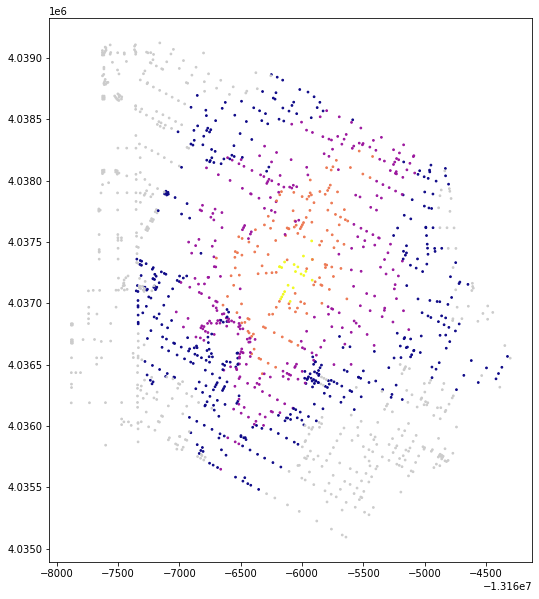

In [74]:
westlake_node.plot(figsize=(10,10),
               color=westlake_node['color'],
               markersize=3)

Sadang 4: 

In [75]:
# loop through each trip time and associated color
for time, color in list(time_color):

    # for each trip time, create an egograph of nodes that fall within that distance
    subgraph = nx.ego_graph(sadang4, S_center_node, radius=time, distance='time')

    print('There are ' + str(len(subgraph.nodes())) + ' nodes within ' + str(time) + ' minutes ')
    
    # for each of those nodes, update the gdf_nodes dataframe and assign it with its associated distance color
    for node in subgraph.nodes():
        sadang4_node.loc[node,'time'] = str(time) + ' mins'
        sadang4_node.loc[node,'color'] = color

There are 85 nodes within 20 minutes 
There are 85 nodes within 15 minutes 
There are 85 nodes within 10 minutes 
There are 63 nodes within 5 minutes 


In [76]:
# spot check
sadang4_node[['osmid','highway','time','color']].sample(20)

KeyError: "['highway'] not in index"

In [77]:
sadang4_node.head()

,y,x,osmid,lon,lat,geometry,time,color
1685686378,4.506534e+06,1.413475e+07,1685686378,126.974611,37.482197,POINT (14134749.029 4506533.688),10 mins,#ed7953
1685686503,4.506456e+06,1.413463e+07,1685686503,126.973570,37.481644,POINT (14134633.179 4506456.057),5 mins,#f0f921
1685686548,4.506610e+06,1.413475e+07,1685686548,126.974583,37.482739,POINT (14134745.979 4506609.735),10 mins,#ed7953
1685686600,4.506475e+06,1.413475e+07,1685686600,126.974589,37.481781,POINT (14134746.580 4506475.373),5 mins,#f0f921
2826150777,4.506746e+06,1.413448e+07,2826150777,126.972159,37.483708,POINT (14134476.051 4506745.642),5 mins,#f0f921


In [78]:
westlake_node.head()

,y,x,osmid,lon,lat,highway,geometry,time,color
18166164,4.038560e+06,-1.316732e+07,18166164,-118.284053,34.072644,NaN,POINT (-13167320.516 4038560.490),NaN,#cccccc
18166944,4.037759e+06,-1.316579e+07,18166944,-118.270308,34.066679,traffic_signals,POINT (-13165790.407 4037758.891),10 mins,#ed7953
21300247,4.036588e+06,-1.316641e+07,21300247,-118.275888,34.057963,traffic_signals,POINT (-13166411.625 4036587.645),10 mins,#ed7953
21300249,4.035921e+06,-1.316518e+07,21300249,-118.264867,34.052999,traffic_signals,POINT (-13165184.784 4035920.706),NaN,#cccccc
21306066,4.036381e+06,-1.316603e+07,21306066,-118.272496,34.056422,traffic_signals,POINT (-13166033.996 4036380.614),15 mins,#9c179e


Where did the 'highway' go? ;-; 

I went back up to the code to check sadang4_node, and it never had a 'highway' column. 
Sad... so does that mean we may not be able to create isochrome maps for Sadang 4 dong? Could we use the edge data somehow? Bc it has the highway column: 

In [79]:
sadang4_edge.head()

,osmid,name,highway,oneway,length,geometry,u,v,key,walk_time
0,156298102,사당로18길,residential,False,46.265,"LINESTRING (14134749.029 4506533.688, 14134746...",1685686378,1685686600,0,0.616867
1,156298102,사당로18길,residential,False,60.327,"LINESTRING (14134749.029 4506533.688, 14134745...",1685686378,1685686548,0,0.804360
2,419521875,사당로20가길,residential,False,50.898,"LINESTRING (14134749.029 4506533.688, 14134798...",1685686378,4195684426,0,0.678640
3,419521875,사당로20가길,residential,False,57.091,"LINESTRING (14134749.029 4506533.688, 14134706...",1685686378,2876972760,0,0.761213
4,419521861,사당로20나길,residential,False,9.021,"LINESTRING (14134633.179 4506456.057, 14134640...",1685686503,2826160235,0,0.120280


I'm gonna look at the node dataframe derived from another Seoul neighborhood. 
Jungang-dong is the second most densely populated neighborhood in Seoul. 

In [80]:
# configure the place, network type, trip times, and travel speed
seoul_check_node = 'Jungang-dong, Seoul, South Korea'
network_type = 'walk'
trip_times = [5, 10, 15, 20] #in minutes
meters_per_minute = 75 # travel distance per minute

In [81]:
# download the street network
jungang = ox.graph_from_place(seoul_check_node, network_type=network_type)

In [82]:
# project our network data to Web Mercator (measurements are in meters)
jungang = ox.project_graph(jungang, to_crs='epsg:3857')

In [83]:
# convert nodes and edges to two separate geodataframes 
jungang_node, junang_edge = ox.graph_to_gdfs(jungang)

In [84]:
jungang_node.head()

,y,x,osmid,lon,lat,highway,geometry
436848352,4.506530e+06,1.413229e+07,436848352,126.952556,37.482170,NaN,POINT (14132293.911 4506529.887)
436848353,4.506540e+06,1.413222e+07,436848353,126.951935,37.482239,NaN,POINT (14132224.793 4506539.524)
436848354,4.506578e+06,1.413192e+07,436848354,126.949238,37.482511,traffic_signals,POINT (14131924.497 4506577.709)
436867652,4.507192e+06,1.413167e+07,436867652,126.946960,37.486887,NaN,POINT (14131670.945 4507191.588)
436867655,4.507113e+06,1.413226e+07,436867655,126.952258,37.486325,traffic_signals,POINT (14132260.760 4507112.689)


Okay Jungang-dong has the highway column.. Why doesn't Sadang 4-dong? 

### Dissolve

### Map it all 
(finally) 

(lol we weren't done yet)
### Make it better 